In [1]:
#Random Selection
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [8]:
df = pd.read_csv('ads CTR optimisation.csv')
df.head()

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Ad 1    10000 non-null  int64
 1   Ad 2    10000 non-null  int64
 2   Ad 3    10000 non-null  int64
 3   Ad 4    10000 non-null  int64
 4   Ad 5    10000 non-null  int64
 5   Ad 6    10000 non-null  int64
 6   Ad 7    10000 non-null  int64
 7   Ad 8    10000 non-null  int64
 8   Ad 9    10000 non-null  int64
 9   Ad 10   10000 non-null  int64
dtypes: int64(10)
memory usage: 781.4 KB


In [10]:
df.describe()

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,0.170300,0.129500,0.072800,0.119600,0.269500,0.012600,0.111200,0.209100,0.095200,0.04890
std,0.375915,0.335769,0.259821,0.324509,0.443722,0.111546,0.314395,0.406686,0.293506,0.21567
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


In [12]:
import random
N = 10000
d = 10
toplam = 0
secilenler = []
for n in range(0,N):
    ad = random.randrange(d)
    secilenler.append(ad)
    odul = df.values[n,ad]
    toplam += odul
print(toplam)

1255


(array([1052., 1030.,  967., 1052.,  954., 1002.,  966.,  987., 1024.,
         966.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <BarContainer object of 10 artists>)

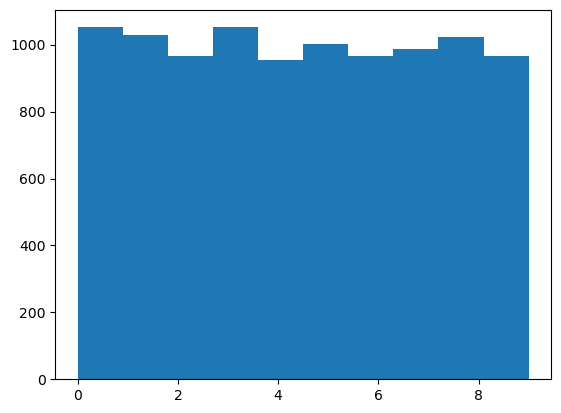

In [13]:
plt.hist(secilenler)

In [18]:
#Upper Confidence Bound
import math
oduller = [0]*d
toplam = 0
tiklamalar = [0]*d
secilenler = []
for n in range(0,N):
    ad = 0
    max_ucb = 0
    for i in range(0,d):
        if(tiklamalar[i] > 0):
            ortalama = oduller[i]/tiklamalar[i]
            delta = math.sqrt(3/2*math.log(n)/tiklamalar[i])
            ucb = ortalama + delta
        else:
            ucb = N+1
        if max_ucb < ucb:
            max_ucb = ucb
            ad = i
    secilenler.append(ad)
    tiklamalar[ad] += 1
    odul = df.values[n,ad]
    oduller[ad] += odul
    toplam += odul
print('Toplam odul : ', toplam)

Toplam odul :  2211


(array([ 502.,  364.,  278.,  317., 6434.,  147.,  326., 1130.,  331.,
         171.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <BarContainer object of 10 artists>)

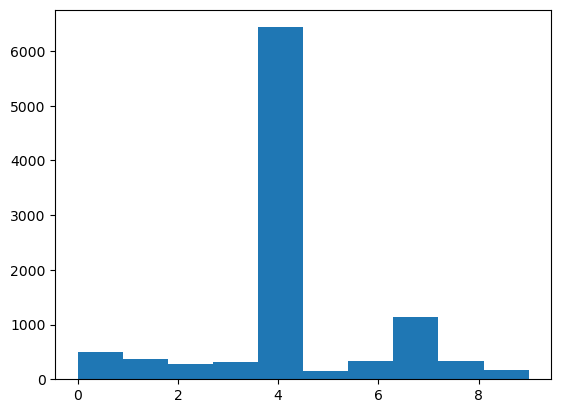

In [24]:
plt.hist(secilenler)

In [25]:
#Thompson
oduller = [0]*d
toplam = 0
secilenler = []
birler = [0] * d
sifirlar = [0] * d
for n in range(0,N):
    ad = 0
    max_th = 0
    for i in range(0,d):
        rasbeta = random.betavariate(birler[i] + 1, sifirlar[i] + 1)
        if rasbeta > max_th:
            max_th = rasbeta
            ad = i
    secilenler.append(ad)
    odul = df.values[n,ad]
    if odul == 1:
        birler[ad] += 1
    else:
        sifirlar[ad] += 1
    toplam += odul
print('Toplam odul : ', toplam)

Toplam odul :  2563


(array([ 176.,  115.,   73.,  107., 8520.,   30.,   45.,  781.,  108.,
          45.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <BarContainer object of 10 artists>)

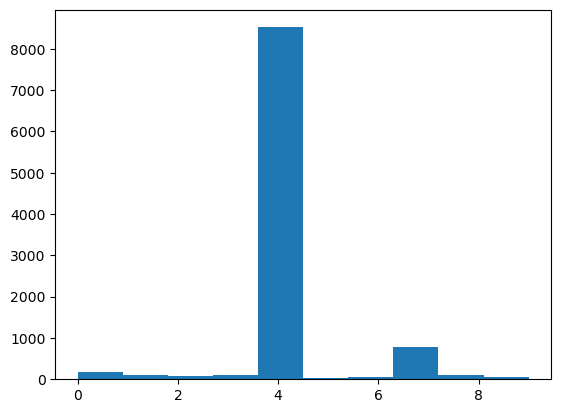

In [26]:
plt.hist(secilenler)